In [2]:
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
remove_domains_dict = {"cpc3": ['Y10','Y04','Y02','D10','F05', 'G16'],
                        "cpc4": ['Y10S', 'Y10T', 'Y04S', 'Y02A', 'Y02B', 'Y02C','Y02D','Y02E','Y02P','Y02T','Y02W','D10B','F05B','F05C','F05D', 'G16H']}

In [4]:
def removeNodes(g, remove_list):
    for item in remove_list:
        if (g.has_node(item)):
            g.remove_node(item)
    return g

In [5]:
def CleanNetwork(fn, tag):
    g = nx.read_weighted_edgelist(fn)
    g = removeNodes(g, remove_domains_dict[tag])
    return g

def loadDescription(fn, g):
    desp_df = pd.DataFrame(pd.read_csv(fn, sep=','))
    labels = list(g.nodes())
    labels_desp = [desp_df[desp_df['Class'] == label]['Description'].iloc[0] for label in labels]
    return labels_desp

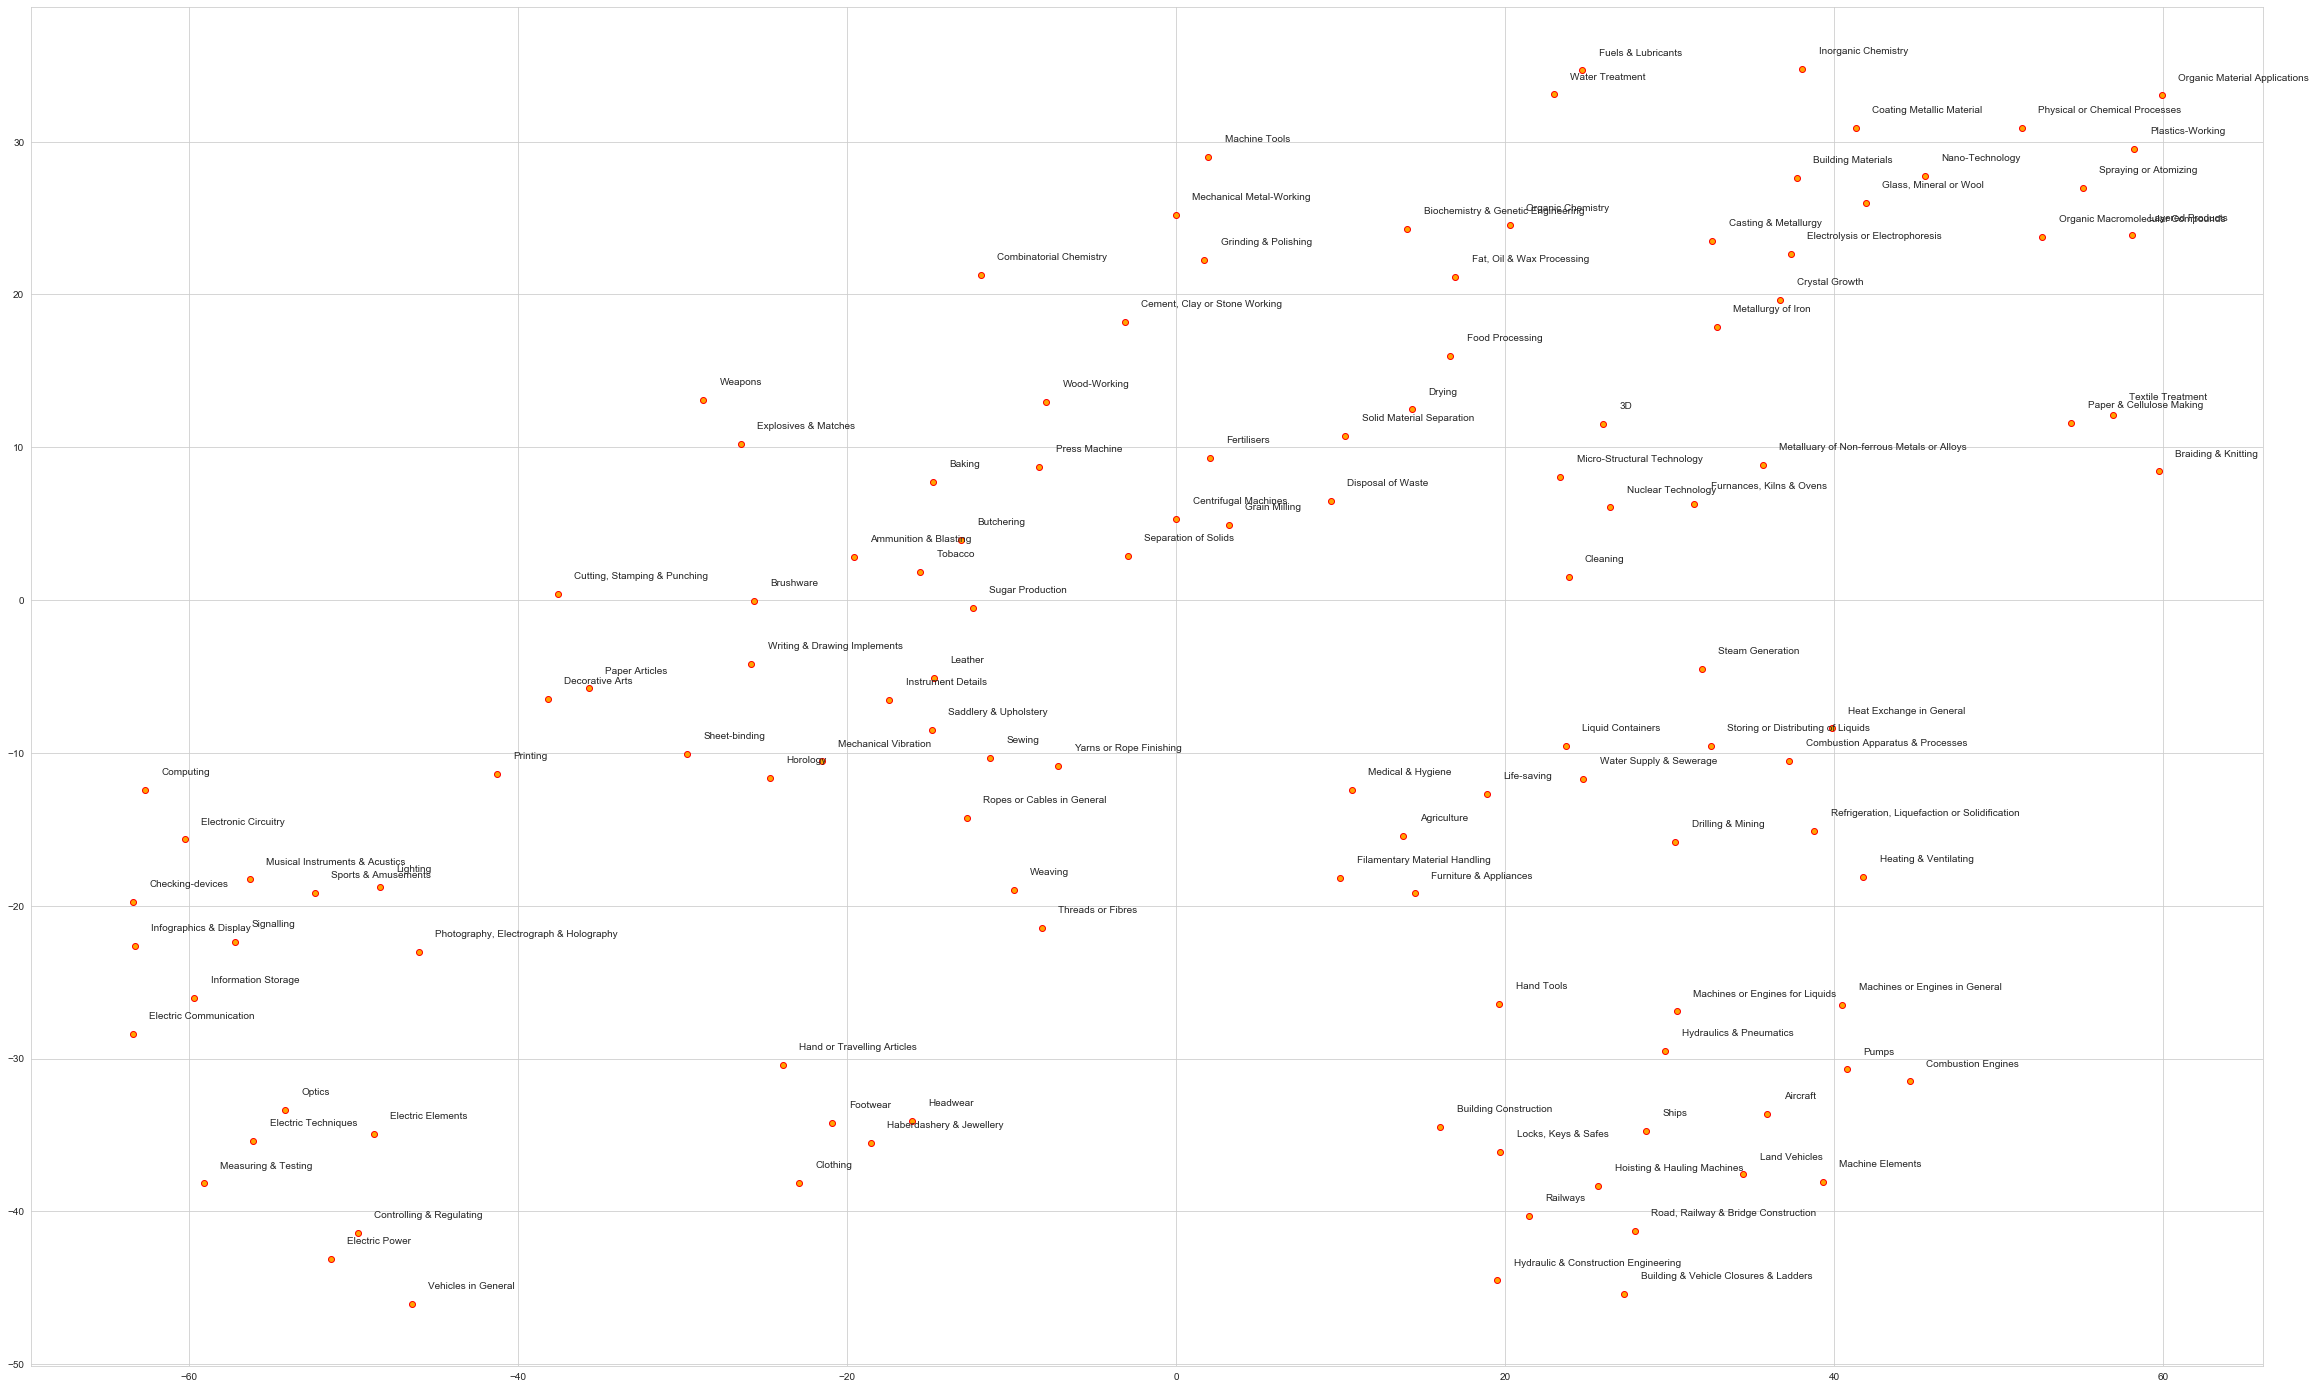

In [39]:
g = CleanNetwork('co_reference_network_cpc3_1976_2017.txt', 'cpc3')
labels_desp = loadDescription('cpc3_descriptions.csv', g)
matrix_ = nx.to_numpy_matrix(g)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=5, learning_rate=50)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(matrix_)

plt.figure(figsize=(40, 25))
plt.scatter(result[:, 0], result[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels_desp, result[:, 0], result[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

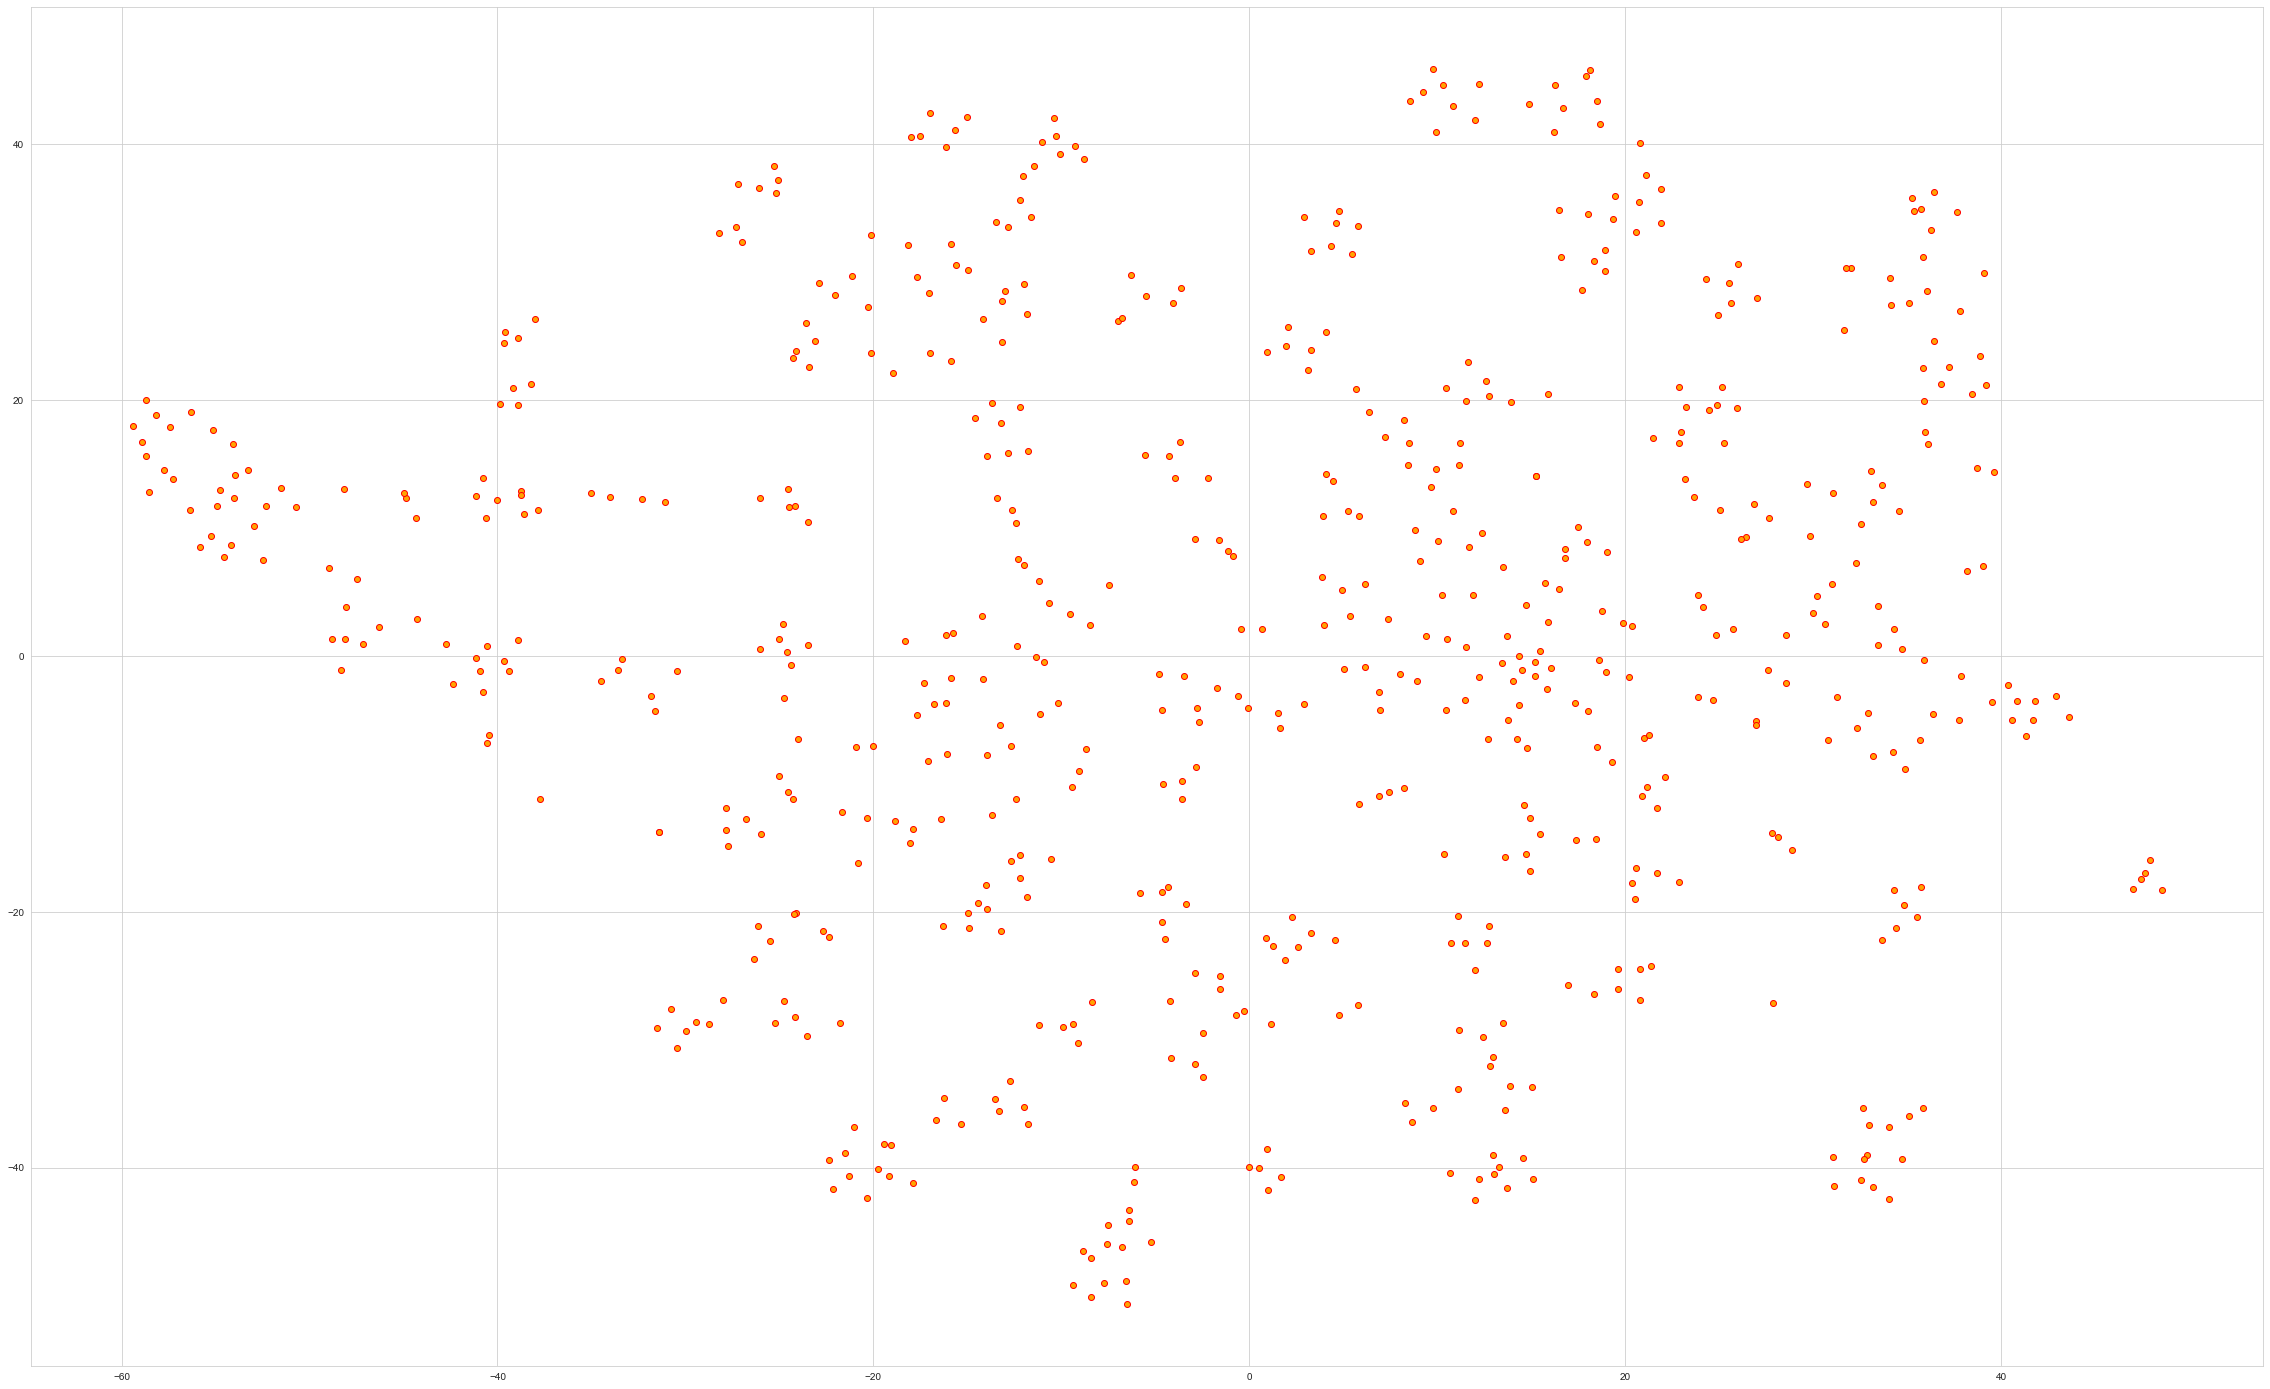

In [40]:
g = CleanNetwork('co_reference_network_cpc4_1976_2017.txt', 'cpc3')
labels_desp = loadDescription('CPC4_descriptions.csv', g)
matrix_ = nx.to_numpy_matrix(g)

tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=10, learning_rate=200)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(matrix_)

plt.figure(figsize=(40, 25))
plt.scatter(result[:, 0], result[:, 1], c='orange', edgecolors='r')
# for label, x, y in zip(labels_desp, result[:, 0], result[:, 1]):
#     plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
